# Project Proposal

## How Horsepower Varies Based on the Numbers of Cylinders in a Car Engine


## Introduction


There are many factors that determine the performance of a car. Previous research demonstrates that the engine efficieny is related to the volume and number of the cylinders (source). However, there are few and limited studies on the relationship between the number of cylinders and horsepower. In general, cars with different number of cylinders have different horsepower (source). We are interested in the different effects on horsepower between the cars with 4- and 6-cylinder engines. Our question is: "Do cars with 6-cylinder engines have higher horsepowers than cars with 4-cylinder engines?" We will answer this question by analysing the sample mean (the location statistics) and the standard deviation (the scale statistics) of the horsepower and how it differs with the number of cylinders in the samples.

Based on our question, our competeing hypotheses are (where μ represents the average horsepower):
- Null Hypothesis: There is no difference in horsepower between 4- and 6-cylinder engines (μ<sub>6-cyl</sub> − μ<sub>4-cyl</sub> = 0)
- Alternative Hypothesis: 6-cylinder engines have a greater horsepower than 4-cylinder engines (μ<sub>6-cyl</sub> − μ<sub>4-cyl</sub> > 0)

Our data set is the Auto MPG data set, which was obtained from Carnegie Mellon University's StatLib library. The 1983 American Statistical Association Exposition made use of this dataset. 

Attribute informations:

|Variables|Attribute|
|:---:|:---:|
|mpg|continuous|
|cylinders|multi-valued discrete|
|displacement|continuous|
|horsepower|continuous|
|weight|continuous|
|acceleration|continuous|
|model year|multi-valued discrete|
|origin|multi-valued discrete|
|car name|string (unique for each instance)|



## Preliminary Results


## Load Packages

In [ ]:
library(tidyverse)
library(infer)
library(repr)
library(cowplot)
library(datateachr)
library(digest)
library(dplyr)

## Load Data

In [2]:
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", 
              "auto-mpg.data")

In [3]:
cars <- read.table("auto-mpg.data") 
head(cars)

V1 V2 V3  V4    V5   V6   V7 V8 V9                       
1 18 8  307 130.0 3504 12.0 70 1  chevrolet chevelle malibu
2 15 8  350 165.0 3693 11.5 70 1  buick skylark 320        
3 18 8  318 150.0 3436 11.0 70 1  plymouth satellite       
4 16 8  304 150.0 3433 12.0 70 1  amc rebel sst            
5 17 8  302 140.0 3449 10.5 70 1  ford torino              
6 15 8  429 198.0 4341 10.0 70 1  ford galaxie 500

## Clean And Wrangle The Data

1.Rename the variables and clean the data. The variable of horsepower is changed into a quantity variable, and the variable of the number of cylinders is changed into a categorical variable. Then, we delete the "NA" in the "mpg", "horsepower" and "acceleration" columns.

In [1]:
cars <- read.table("auto-mpg.data")%>%
    rename(mpg = V1,
           cylinders = V2,
           dispacement = V3,
           horsepower = V4,
           weight = V5,
           acceleration = V6,
           model = V7,
           origin = V8,
           name = V9) %>%
    mutate(horsepower = as.numeric(horsepower),
           cylinders = as.factor(cylinders))%>%
    filter(!is.na(mpg),
           !is.na(horsepower),
           !is.na(acceleration),
           cylinders %in% c(6,4))
head(cars)

ERROR: Error in read.table("auto-mpg.data") %>% rename(mpg = V1, cylinders = V2, : could not find function "%>%"


2. Select the columns relevant to our study and calculate the statistics we will use.

In [5]:
cars_variables <- cars %>% 
    select(cylinders, horsepower)
cars_summ_hp <- cars %>%
    group_by(cylinders) %>%
    summarize(size = n(),
              mean = mean(horsepower),
              sd = sd(horsepower),
              minimum = min(horsepower),
              lower_quartile = quantile(horsepower, 0.25),
              median = median(horsepower),
              upper_quartile = quantile(horsepower, 0.75),
              max = max(horsepower))
head(cars_variables)
cars_summ_hp

cylinders horsepower
1 8         130       
2 8         165       
3 8         150       
4 8         150       
5 8         140       
6 8         198

cylinders size mean      sd       minimum lower_quartile median
1 4         199   78.28141 14.52310 46       68.0           78   
2 6          83  101.50602 14.31047 72       92.5          100   
3 8         103  158.30097 28.45355 90      140.0          150   
  upper_quartile max
1  88            115
2 110            165
3 175            230

## Plot The Relevant Data

## Boxplot of The Cylinders And The Horsepower

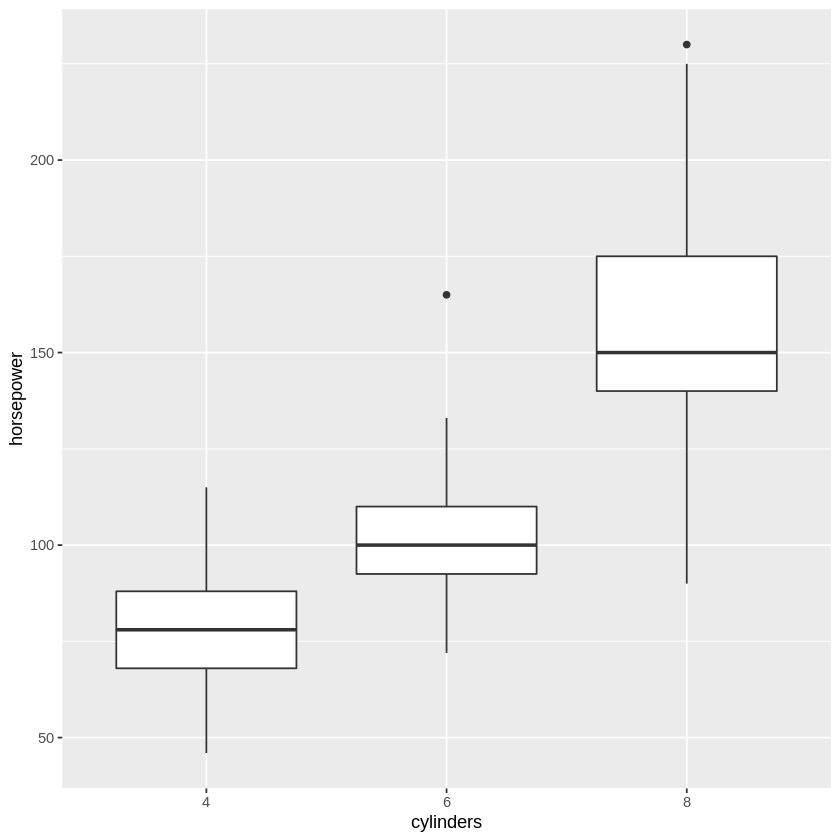

In [6]:
cars_boxplot <- cars %>%
    ggplot(aes(x= cylinders, y = horsepower)) +
    geom_boxplot()
cars_boxplot

Because the standard deviation of horsepower of 4 cylinders is similar to the standard deviation ho®sepower of 6 cylinders, we decided to use the average horsepower of 4 cylinders and the average horsepower of 6 cylinders for the study.

## Bootstrap Sampling Distribution

1. 4 cylinders

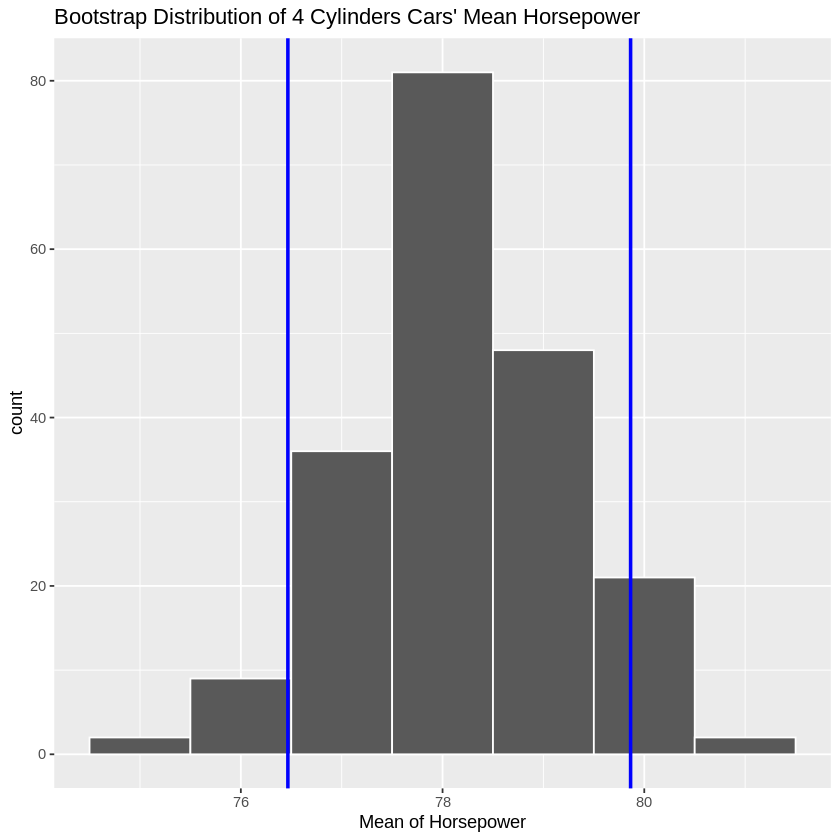

In [7]:
cars_bootstrapped1 <- cars %>%
    filter(cylinders == "4") %>%
    specify(response = horsepower) %>%
    generate(type = "bootstrap", reps = 199) %>%
    calculate(stat = "mean")

cars_ci1 <- cars_bootstrapped1 %>%
    get_confidence_interval(level = 0.90, type = "percentile")

cars_4cylinders_plot <- cars_bootstrapped1 %>%
    ggplot(aes(x = stat)) +
    geom_histogram(binwidth = 1, color = "white") +
    geom_vline(xintercept = cars_ci1[[1]], color = "blue", size = 1) +
    geom_vline(xintercept = cars_ci1[[2]], color = "blue", size = 1) +
    xlab("Mean of Horsepower") +
    ggtitle("Bootstrap Distribution of 4 Cylinders Cars' Mean Horsepower")

cars_4cylinders_plot

2. 6 cylinders

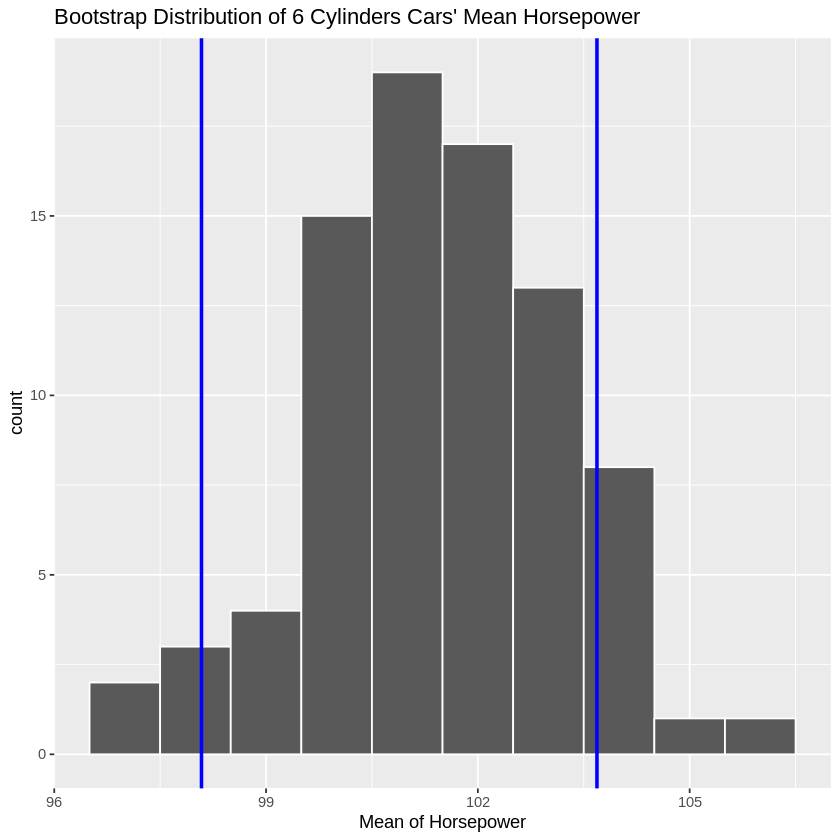

In [15]:
cars_bootstrapped2 <- cars %>%
    filter(cylinders == "6") %>%
    specify(response = horsepower) %>%
    generate(type = "bootstrap", reps = 83) %>%
    calculate(stat = "mean")

cars_ci2 <- cars_bootstrapped2 %>%
    get_confidence_interval(level = 0.90, type = "percentile")

cars_6cylinders_plot <- cars_bootstrapped2 %>%
    ggplot(aes(x = stat)) +
    geom_histogram(binwidth = 1, color = "white") +
    geom_vline(xintercept = cars_ci2[[1]], color = "blue", size = 1) +
    geom_vline(xintercept = cars_ci2[[2]], color = "blue", size = 1) +
    xlab("Mean of Horsepower") +
    ggtitle("Bootstrap Distribution of 6 Cylinders Cars' Mean Horsepower")

cars_6cylinders_plot

## Method : Plan

## Reference

A. R. Millner, "Multi-hundred horsepower permanent magnet brushless disc motors," Proceedings of 1994 IEEE Applied Power Electronics Conference and Exposition - ASPEC'94, 1994, pp. 351-355 vol.1, doi: 10.1109/APEC.1994.316378.